In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as mp
import numpy as np

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as mp
import numpy as np

# Load the data into a DataFrame
barabasi = pd.read_csv("/content/barabasi.csv")
Wiki = pd.read_csv("/content/Wiki Vote.csv")
BTC = pd.read_csv("/content/soc-sign-bitcoinotc.csv")



# Create a directed graph from the DataFrame
G_full = nx.from_pandas_edgelist(barabasi, 'source', 'target', create_using=nx.Graph)
Votes = nx.from_pandas_edgelist(Wiki, 'Source', 'Target', create_using=nx.DiGraph)
Bitcoin = nx.from_pandas_edgelist(BTC, 'Source', 'Target', create_using=nx.DiGraph)


# Calculate network statistics
num_nodes_full = G_full.number_of_nodes()
num_edges_full = G_full.number_of_edges()
max_degree_full = max(dict(G_full.degree()).values())
min_degree_full = min(dict(G_full.degree()).values())
average_degree_full = np.mean(list(dict(G_full.degree()).values()))
std_dev_degree_full = np.std(list(dict(G_full.degree()).values()))

# Output the full network statistics
(num_nodes_full, num_edges_full, max_degree_full, min_degree_full, average_degree_full, std_dev_degree_full)

(10000, 29988, 439, 3, 5.9976, 8.900415397047487)

In [ ]:
data.head()

,source,target
NaN,source,target
0.0,0,1
1.0,0,2
2.0,0,3
3.0,0,4


(0.0, 0.003)

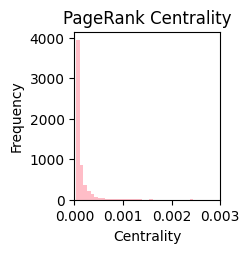

In [ ]:
mp.subplot(2,3,5)
mp.hist(list(pagerank_centrality.values()),bins=200,alpha=0.9,color = 'lightpink')
mp.title('PageRank Centrality')
mp.xlabel('Centrality')
mp.ylabel('Frequency')
mp.xlim(0, 0.003)

In [ ]:
import networkx as nx
import numpy as np
import random

def setup_activation_probabilities(G):
    for node in G.nodes():
        edges = list(G.out_edges(node, data=True))
        if edges:  # Ensure there are outgoing edges
            probabilities = np.random.dirichlet(np.ones(len(edges)), size=1)[0]
            for ((u, v, data), prob) in zip(edges, probabilities):
                G[u][v]['activation_probability'] = prob

def run_icm(G, initial_active):
    active_set = set(initial_active)
    new_active = set(initial_active)
    steps = 0

    while new_active:
        current_active = set()
        for node in new_active:
            neighbors = [v for v in G.neighbors(node) if v not in active_set]
            for neighbor in neighbors:
                prob = G[node][neighbor]['activation_probability']
                if random.random() < prob:
                    current_active.add(neighbor)
        new_active = current_active - active_set
        active_set.update(current_active)
        if new_active:
            steps += 1
    return steps

def average_icm_steps(G, num_simulations=10):
    steps_list = []
    for _ in range(num_simulations):
        initial_node = random.choice(list(G.nodes()))
        steps = run_icm(G, [initial_node])
        steps_list.append(steps)
    return np.mean(steps_list)

# Create sample graphs
# G1 = nx.gnp_random_graph(10000, 0.4, directed=True)
# G2 = nx.gnp_random_graph(10000, 0.2, directed=True)
# G3 = nx.gnp_random_graph(10000, 0.6, directed=True)

# Set up probabilities
setup_activation_probabilities(G_full)
# setup_activation_probabilities(G2)
# setup_activation_probabilities(G3)

# Compute average steps for each graph
avg_steps_G1 = average_icm_steps(G_full)
# avg_steps_G2 = average_icm_steps(G2)
# avg_steps_G3 = average_icm_steps(G3)

print("Average steps for G1:", avg_steps_G1)
# print("Average steps for G2:", avg_steps_G2)
# print("Average steps for G3:", avg_steps_G3)


In [ ]:
import networkx as nx
import numpy as np
import random
import pandas as pd

# Load the data into a DataFrame
data = pd.read_csv("/content/barabasi.csv", header=None, names=['source', 'target'])

# Create an undirected graph from the DataFrame
G_full = nx.from_pandas_edgelist(data, 'source', 'target', create_using=nx.Graph())

def setup_activation_probabilities(G):
    for node in G.nodes():
        edges = list(G.edges(node, data=True))
        if edges:  # Ensure there are edges
            probabilities = np.random.dirichlet(np.ones(len(edges)), size=1)[0]
            for ((u, v, _), prob) in zip(edges, probabilities):
                G[u][v]['activation_probability'] = prob
                if G.is_directed():
                    if G.has_edge(v, u):  # Only set reverse probability if the reverse edge exists
                        G[v][u]['activation_probability'] = prob
                else:
                    G[v][u]['activation_probability'] = prob  # Ensure symmetry for undirected graph

def run_icm(G, initial_active):
    active_set = set(initial_active)
    new_active = set(initial_active)
    steps = 0

    while new_active:
        current_active = set()
        for node in new_active:
            neighbors = [v for v in G.neighbors(node) if v not in active_set]
            for neighbor in neighbors:
                prob = G[node][neighbor]['activation_probability']
                if random.random() < prob:
                    current_active.add(neighbor)
        new_active = current_active - active_set
        active_set.update(current_active)
        if new_active:
            steps += 1
    return steps

def average_icm_steps(G, num_simulations=10):
    steps_list = []
    for _ in range(num_simulations):
        initial_node = random.choice(list(G.nodes()))
        steps = run_icm(G, [initial_node])
        steps_list.append(steps)
    return np.mean(steps_list)

# Set up probabilities
setup_activation_probabilities(G_full)
setup_activation_probabilities(Votes)
setup_activation_probabilities(Bitcoin)

# Compute average steps for the graph
avg_steps_G_full = average_icm_steps(G_full)
avg_steps_Votes = average_icm_steps(Votes)
avg_steps_BTC = average_icm_steps(Bitcoin)

print("Average steps for G_full:", avg_steps_G_full)
print("Average steps for Votes:", avg_steps_Votes)
print("Average steps for BTC:", avg_steps_BTC)


Average steps for G_full: 12.3
Average steps for Votes: 1.5
Average steps for BTC: 3.0
